<p align="center">
  <img src="01_Logo_HSE_full_rus_CMYK.png" width="150"/>
</p>

# Итоговый проект по курсу "Аналитик данных" (ВШЭ)

### Тема проекта: <br><br>**"Предсказание цены криптовалюты (Time Series)"**

---

**Выполнила:** Шиляева Ольга Геннадьевна <br>
**Год:** 2025

---

# Содержание

1. [Вводная часть](#1.-Вводная-часть)
2. [Сбор и подготовка данных](#2.-Сбор-и-подготовка-данных)
3. [Исследовательский анализ данных (EDA)](#3.-Исследовательский-анализ-данных-EDA)
4. [Формирование выборки](#Формирование-выборки)
5. [Базовые модели прогнозирования](#Базовые-модели-прогнозирования)
6. [Модели машинного обучения](#Модели-машинного-обучения)
7. [Обучение и оценка моделей](#Обучение-и-оценка-моделей)
8. [Итоговый прогноз и визуализация](#Итоговый-прогноз-и-визуализация)
9. [Интерпретация результатов](#Интерпретация-результатов)
10. [Заключение](#Заключение)

# 1. Вводная часть

Рынок криптовалют за последние годы стал очень популярным и привлекает внимание как частных инвесторов, так и крупных компаний. Одной из главных особенностей криптовалют является сильная изменчивость цен: курс может заметно меняться даже в течение одного дня. Поэтому многим интересно уметь предсказывать такие колебания и понимать, какие факторы на них влияют.  

Цель этого проекта — попробовать построить модель, которая сможет предсказывать цену выбранной криптовалюты на основе исторических данных.  

### Задачи проекта
1. Собрать и подготовить данные по ценам криптовалют.  
2. Провести исследовательский анализ данных (посмотреть графики, динамику, проверить сезонность и тренды).  
3. Подготовить признаки, которые могут быть полезны для прогноза.  
4. Построить несколько моделей прогнозирования — от простых до более сложных.  
5. Сравнить качество этих моделей и выбрать ту, которая покажет лучший результат.  
6. Построить прогноз и сделать выводы, насколько такой подход можно использовать на практике.

---

In [17]:
#!pip install yfinance --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 4.7 MB/s eta 0:00:00m-:--:--
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.9 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15549 sha256=dce5db1701ab5ed11414ad056d5ef807b1681380d6ced47aff4f6df4a4b7d47b
  Stored in direct

In [19]:
#!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


---

# 2. Сбор и подготовка данных

[Вернуться к содержанию](#Содержание)

In [443]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения графиков и таблиц
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

# Загрузка данных по Bitcoin (BTC-USD) - все данные с 17.09.2014
# data_out = yf.download("BTC-USD", start="2014-09-17", end="2025-08-17", interval="1d")

# Загрузка данных по Bitcoin (BTC-USD) - возьмем данные с 01.01.2025
data_out = yf.download("BTC-USD", start="2025-01-01", end="2025-08-17", interval="1d")

print("Размер датасета:", data_out.shape)
data_out.head(15)

/var/folders/gc/7bxqzl8d4kj4nxgzh387r3sm0000gn/T/ipykernel_11327/499753180.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_out = yf.download("BTC-USD", start="2025-01-01", end="2025-08-17", interval="1d")
[*********************100%***********************]  1 of 1 completed

Размер датасета: (228, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705
2025-01-07,96922.703125,102712.484375,96132.875000,102248.851562,58685738547
2025-01-08,95043.523438,97258.320312,92525.843750,96924.164062,63875859171


In [445]:
#сохранение датасета для надежности
data_out.to_csv('data_crypto.csv')

In [447]:
data = pd.read_csv("data_crypto.csv")

display(data.head(15))

# Посмотрим на типы данных
display(data.info())

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2025-01-01,94419.7578125,94929.8671875,92788.125,93425.1015625,24519888919
3,2025-01-02,96886.875,97739.8203125,94201.5703125,94416.2890625,46009564411
4,2025-01-03,98107.4296875,98956.9140625,96034.6171875,96881.7265625,35611391163
5,2025-01-04,98236.2265625,98734.4296875,97562.9765625,98106.9921875,22342608078
6,2025-01-05,98314.9609375,98813.3046875,97291.765625,98233.90625,20525254825
7,2025-01-06,102078.0859375,102482.875,97926.1484375,98314.953125,51823432705
8,2025-01-07,96922.703125,102712.484375,96132.875,102248.8515625,58685738547
9,2025-01-08,95043.5234375,97258.3203125,92525.84375,96924.1640625,63875859171


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   230 non-null    object
 1   Close   229 non-null    object
 2   High    229 non-null    object
 3   Low     229 non-null    object
 4   Open    229 non-null    object
 5   Volume  229 non-null    object
dtypes: object(6)
memory usage: 10.9+ KB


None

In [451]:
# Удаляем первые две строки
data = data.drop([0, 1]).reset_index(drop=True)

# Приводим столбец "Price" к формату даты
data.rename(columns={"Price": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Приводим остальные столбцы к float
for col in ["Close", "High", "Low", "Open", "Volume"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

display(data.head(15))

# Посмотрим на получившиеся типы данных
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
1,2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2,2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
3,2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705
4,2025-01-07,96922.703125,102712.484375,96132.875000,102248.851562,58685738547
5,2025-01-08,95043.523438,97258.320312,92525.843750,96924.164062,63875859171
6,2025-01-09,92484.039062,95349.718750,91220.843750,95043.484375,62777261693
7,2025-01-10,94701.453125,95770.609375,92250.093750,92494.492188,62058693684
8,2025-01-11,94566.593750,94977.687500,93840.046875,94700.835938,18860894100
9,2025-01-12,94488.437500,95367.539062,93712.507812,94565.726562,20885130965


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    226 non-null    datetime64[ns]
 1   Close   226 non-null    float64       
 2   High    226 non-null    float64       
 3   Low     226 non-null    float64       
 4   Open    226 non-null    float64       
 5   Volume  226 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 10.7 KB


None

In [455]:
# Сохранение очищенного датасета длянадежности
data.to_csv('data_crypto_clear.csv', index=False)

In [469]:
# Загрузим сохраненный очищенный датасет для последующей работы
data = pd.read_csv('data_crypto_clear.csv')

display(data.head(10))
display(data.info())

,Date,Close,High,Low,Open,Volume
0,2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
1,2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2,2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
3,2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705
4,2025-01-07,96922.703125,102712.484375,96132.875000,102248.851562,58685738547
5,2025-01-08,95043.523438,97258.320312,92525.843750,96924.164062,63875859171
6,2025-01-09,92484.039062,95349.718750,91220.843750,95043.484375,62777261693
7,2025-01-10,94701.453125,95770.609375,92250.093750,92494.492188,62058693684
8,2025-01-11,94566.593750,94977.687500,93840.046875,94700.835938,18860894100
9,2025-01-12,94488.437500,95367.539062,93712.507812,94565.726562,20885130965


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    226 non-null    object 
 1   Close   226 non-null    float64
 2   High    226 non-null    float64
 3   Low     226 non-null    float64
 4   Open    226 non-null    float64
 5   Volume  226 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 10.7+ KB


None

In [471]:
# Преобразуем формат даты (object) в datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")


In [473]:
# Посмотрим типы данных в датасете и статистические данные
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    226 non-null    datetime64[ns]
 1   Close   226 non-null    float64       
 2   High    226 non-null    float64       
 3   Low     226 non-null    float64       
 4   Open    226 non-null    float64       
 5   Volume  226 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 10.7 KB


None

,Date,Close,High,Low,Open,Volume
count,226,226.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,2025-04-25 12:00:00,100182.267492,101700.024993,98408.969787,100090.027793,4.873894e+10
min,2025-01-03 00:00:00,76271.953125,80823.890625,74436.679688,76273.562500,9.863214e+09
25%,2025-02-28 06:00:00,92723.501953,94456.246094,88204.130859,92727.765625,3.184188e+10
50%,2025-04-25 12:00:00,101796.308594,103723.882812,99520.945312,101486.542969,4.724939e+10
75%,2025-06-20 18:00:00,107683.681641,109065.005859,106679.119141,107363.257812,5.945619e+10
max,2025-08-16 00:00:00,123344.062500,124457.117188,118959.195312,123339.398438,1.817464e+11
std,NaN,11558.185895,11377.469121,11751.484023,11503.719898,2.318961e+10


---
---

# 3. Исследовательский анализ данных EDA

[Вернуться к содержанию](#Содержание)

### Исследовательский анализ данных (EDA)

**Exploratory Data Analysis (EDA)** — это этап, на котором изучаются и описываются данные, чтобы лучше понять их структуру, особенности и возможные закономерности.  

Для чего нужен EDA:
- Чтобы проверить качество данных (есть ли пропуски, ошибки, выбросы).  
- Чтобы увидеть общие тренды и динамику показателей.  
- Чтобы найти скрытые зависимости и взаимосвязи между признаками.  
- Чтобы выбрать правильные методы моделирования и построения прогнозов.  

EDA включает:
1. Общая статистика — минимум, максимум, средние значения, стандартное отклонение.  
2. Визуализации — графики, которые показывают динамику цен и объёмов торгов.  
3. Распределения — гистограммы и boxplot, чтобы понять, где сосредоточены основные значения.  
4. Аномалии и выбросы — резкие скачки цен или объёмов, которые могут сильно влиять на модель.  
5. Связи между переменными — корреляции между Open, High, Low, Close и Volume.  
6. Сезонность и тренды — проверка, есть ли повторяющиеся паттерны (например, рост в определённые месяцы).  

В реализации Проекта будут использоваться:
- Статистические методы: describe(), корреляции.  
- Графики:  
  - линейные (динамика цен),  
  - гистограммы (распределение цен и доходностей),  
  - boxplot (распределения и выбросы),  
  - тепловая карта корреляций.  
- Методы анализа временных рядов: автокорреляция, сезонность.  

Это необходимо, чтобы:
- понять данные до начала моделирования.  
- заранее выявить потенциальные проблемы (аномалии, несбалансированные данные).  
- принять решения о том, какие признаки и методы будут полезны при прогнозировании цены криптовалюты.

### Графические визуализации данных о ценах

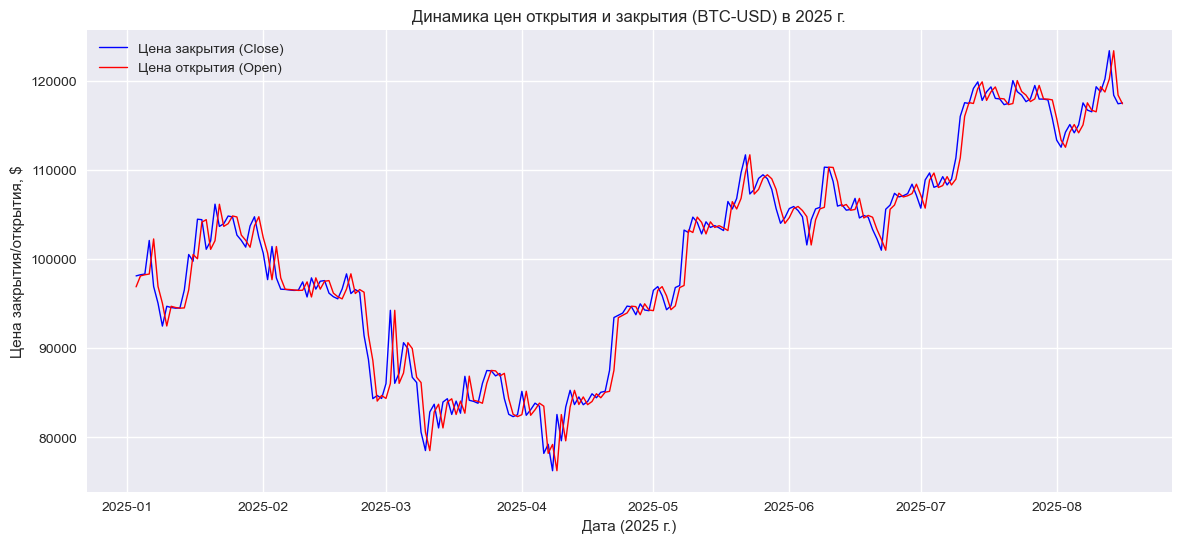

/var/folders/gc/7bxqzl8d4kj4nxgzh387r3sm0000gn/T/ipykernel_11327/2903719695.py:22: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  x = mdates.date2num(data["Date"].dt.to_pydatetime())


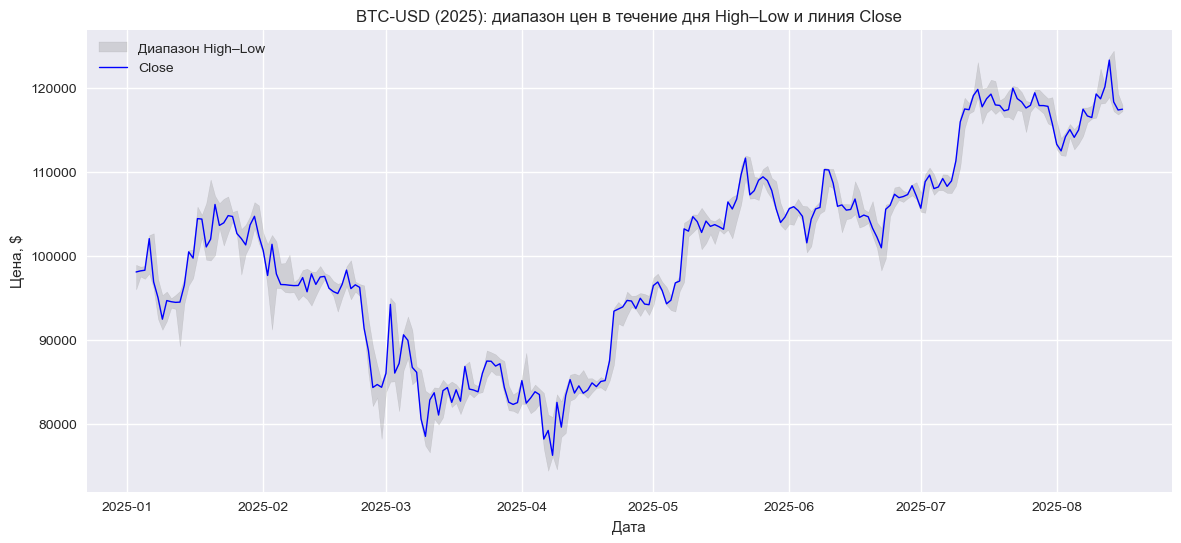

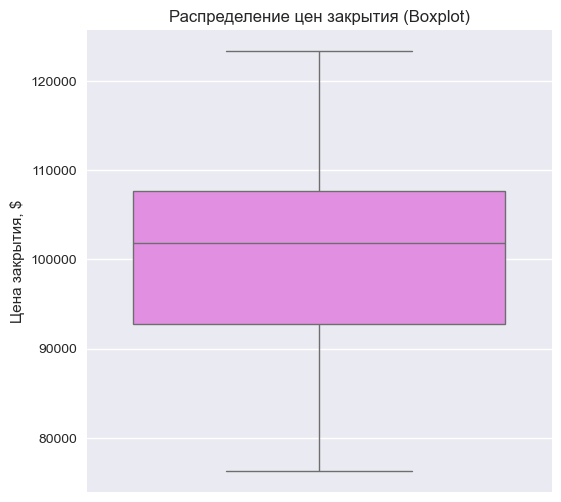

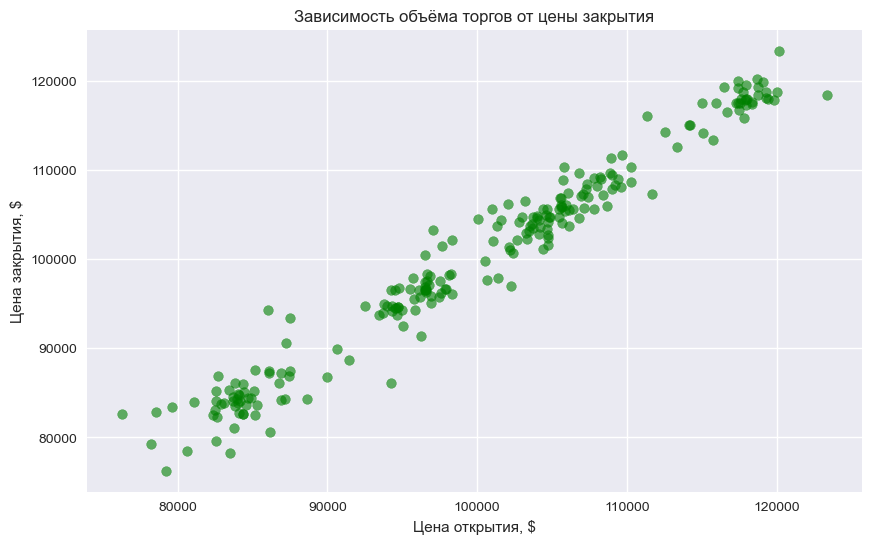

In [498]:
# Построим линейный график цены закрытия в 2025 г.

plt.figure(figsize=(14, 6))

# Линия цены закрытия
plt.plot(data["Date"], data["Close"], label="Цена закрытия (Close)", color="blue", linewidth=1)

# Линия цены открытия
plt.plot(data["Date"], data["Open"], label="Цена открытия (Open)", color="red", linewidth=1)

plt.title("Динамика цен открытия и закрытия (BTC-USD) в 2025 г.")
plt.xlabel("Дата (2025 г.)")
plt.ylabel("Цена закрытия/открытия, $")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.dates as mdates

# Диапазон High–Low + линия Close
# -------------------------------
x = mdates.date2num(data["Date"].dt.to_pydatetime())
plt.figure(figsize=(14, 6))
plt.fill_between(x, data["Low"].values, data["High"].values, 
                 alpha=0.25, label="Диапазон High–Low", color="gray")    # волатильность цен в течение дня
plt.plot(x, data["Close"].values, linewidth=1, label="Close", color="blue")
plt.gca().xaxis_date()
plt.title("BTC-USD (2025): диапазон цен в течение дня High–Low и линия Close")
plt.xlabel("Дата")
plt.ylabel("Цена, $")
plt.legend()
plt.grid(True)
plt.show()

# Распределение цен закрытия
plt.figure(figsize=(6,6))
sns.boxplot(y=data["Close"], color="violet")
plt.title("Распределение цен закрытия (Boxplot)")
plt.ylabel("Цена закрытия, $")
plt.grid(True, axis="y")
plt.show()

# Зависимость цены закрытия от цены открытия
plt.figure(figsize=(10,6))
plt.scatter(data["Open"], data["Close"], alpha=0.6, color="green")
plt.title("Зависимость объёма торгов от цены закрытия")
plt.xlabel("Цена открытия, $")
plt.ylabel("Цена закрытия, $")
plt.grid(True)
plt.show()

### Графические визуализации объемов торгов

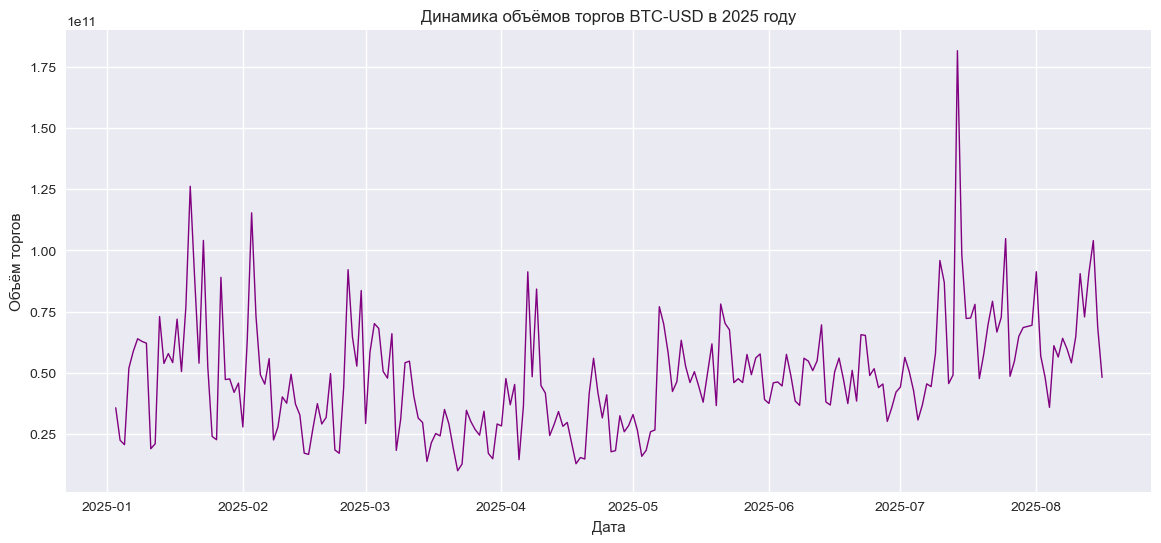

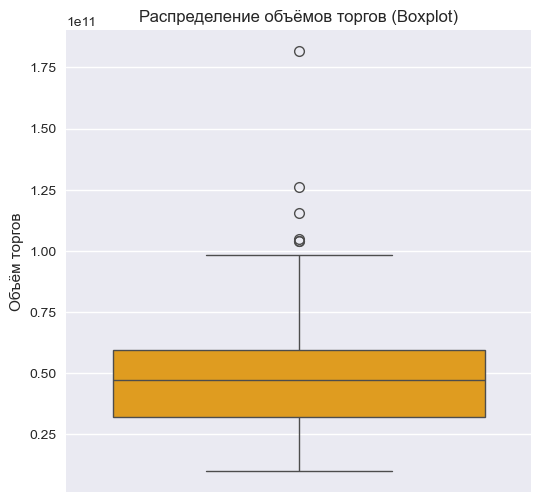

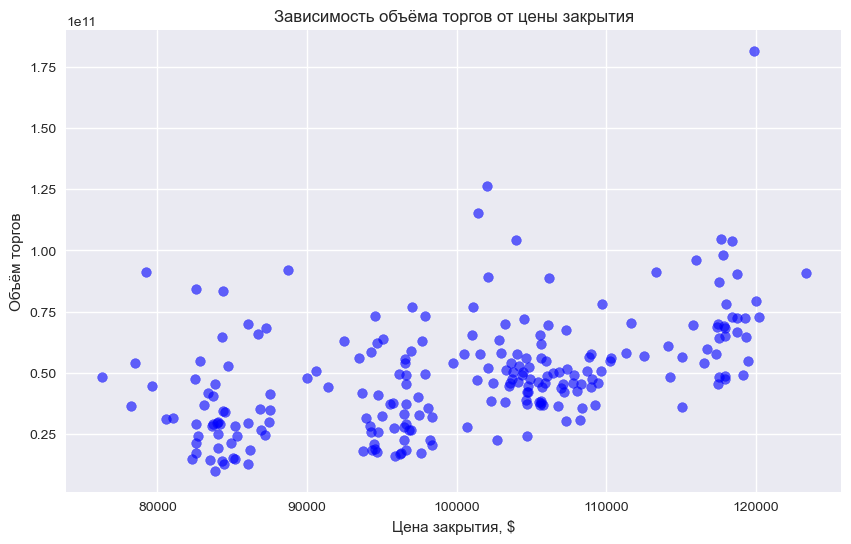

In [501]:
# --- 1) Линейный график объемов ---
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Volume"], color="purple", linewidth=1)
plt.title("Динамика объёмов торгов BTC-USD в 2025 году")
plt.xlabel("Дата")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

# --- 2) Boxplot ---
plt.figure(figsize=(6,6))
sns.boxplot(y=data["Volume"], color="orange")
plt.title("Распределение объёмов торгов (Boxplot)")
plt.ylabel("Объём торгов")
plt.grid(True, axis="y")
plt.show()

# --- 3) Scatter Volume vs Close ---
plt.figure(figsize=(10,6))
plt.scatter(data["Close"], data["Volume"], alpha=0.6, color="blue")
plt.title("Зависимость объёма торгов от цены закрытия")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Объём торгов")
plt.grid(True)
plt.show()

---
---

Для начала исследовательского анализа данных (EDA) сделаем три базовые визуализации:<br>
1.	Распределение цен закрытия (Close) — гистограмма + KDE.<br>
2.	Распределение дневной доходности (returns).<br>
3.	Корреляции между признаками (Open, High, Low, Close, Volume) — тепловая карта.

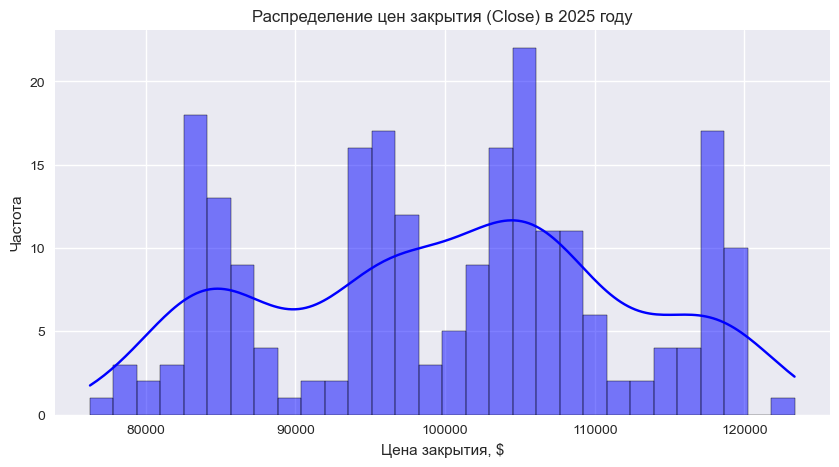

In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Распределение цен закрытия ---
plt.figure(figsize=(10,5))
sns.histplot(data["Close"], bins=30, kde=True, color="blue")
plt.title("Распределение цен закрытия (Close) в 2025 году")
plt.xlabel("Цена закрытия, $")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



**Анализ визуализации "Распределение цен закрытия (Close) в 2025 году"**:<br>
Есть несколько «пиков» (кластеров), где цена закрытия встречалась чаще.<br>
Синяя линия (KDE) — сглаженная оценка плотности распределения.<br>
•	Она показывает, что распределение не симметричное и имеет несколько максимумов (мультимодальное).<br>
•	Явно выделяются 3–4 зоны концентрации цен (около ~85k, ~95k, ~105k и ~118k).<br>
<br>
Вывод:<br>
•	Распределение цен в 2025 году не является нормальным (колоколом), а скорее мультимодальное.<br>
•	Это отражает рыночные циклы: были разные устойчивые уровни, на которых цена часто закрывалась.<br>
•	Такой график подтверждает, что биткоин двигался скачками и удерживался на определённых «плато».<br>
•	Для модели прогнозирования это значит: простые предположения о «нормальности» распределения не подойдут — нужно учитывать волатильность и кластеры цен.

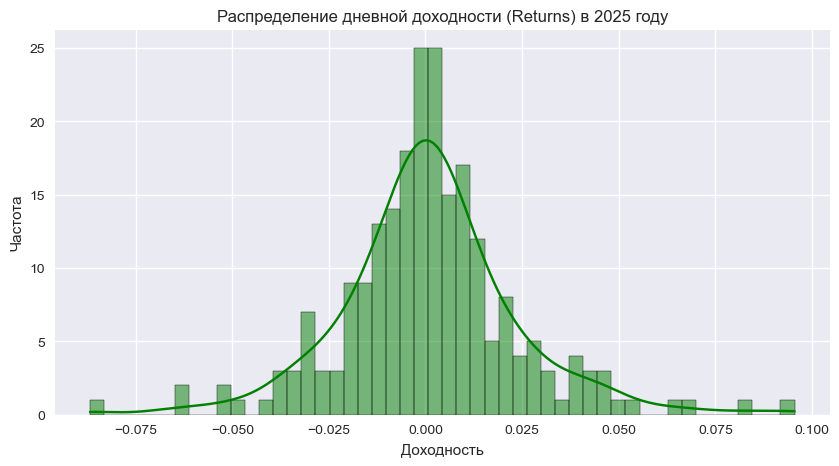

In [506]:
# --- 2) Распределение доходности ---
data["Returns"] = data["Close"].pct_change()  # дневная доходность
plt.figure(figsize=(10,5))
sns.histplot(data["Returns"].dropna(), bins=50, kde=True, color="green")
plt.title("Распределение дневной доходности (Returns) в 2025 году")
plt.xlabel("Доходность")
plt.ylabel("Частота")
plt.grid(True)
plt.show()



Дневная доходность (Returns) показывает, насколько изменилась цена закрытия актива по сравнению с предыдущим днём.

Она рассчитывается как относительное изменение цены:
$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $.<br>


**Анализ визуализации "Распределение дневной доходности (Returns) в 2025 году"**:
1.	Центр около нуля<br>
•	Большинство значений доходности сосредоточено рядом с 0%.<br>
•	Это нормально: в большинстве дней цена сильно не меняется.<br>
2.	Форма распределения<br>
•	График напоминает «колокол» (нормальное распределение), но с особенностями:<br>
•	у него более высокие пики в центре;<br>
•	«толстые хвосты» — больше крайних значений, чем у обычной нормальной кривой.<br>
3.	Выбросы<br>
•	Есть дни с изменением цены на ±7–10%, что говорит о резких скачках рынка (всплески волатильности).<br>
<br>
Вывод:<br>
	•	Распределение доходностей не идеально нормальное: оно суженное в центре и имеет толстые хвосты.<br>
	•	Это типично для финансовых временных рядов: большинство изменений небольшие, но иногда случаются сильные движения.<br>
	•	Для анализа и прогнозирования важно учитывать такие скачки — простая модель «среднее + нормальное распределение» будет недооценивать риск.<br>

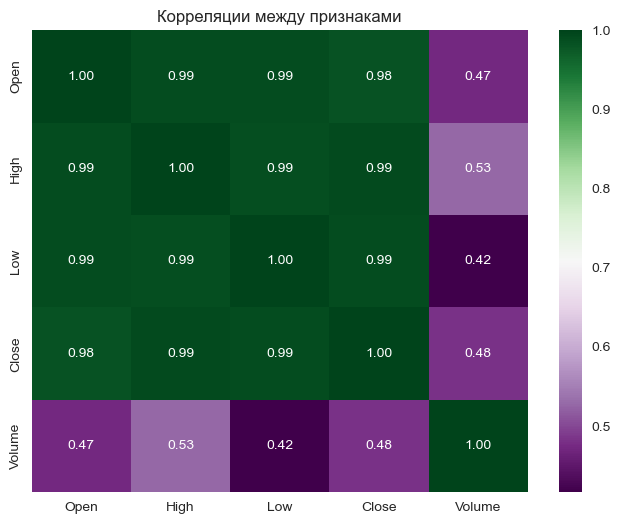

In [510]:
# --- 3) Корреляции между признаками ---
plt.figure(figsize=(8,6))
sns.heatmap(data[["Open","High","Low","Close","Volume"]].corr(),
            annot=True, cmap="PRGn", fmt=".2f")
plt.title("Корреляции между признаками")
plt.show()

**Анализ визуализации "Корреляции между признаками"**:<br>
1.	Сильная корреляция между ценовыми признаками:<br>
	•	Open, High, Low, Close имеют коэффициенты корреляции ~0.98–1.00.<br>
	•	Это ожидаемо: все они отражают одну и ту же динамику цены в течение дня.<br>
2.	Объём торгов (Volume) коррелирует слабо:<br>
	•	Volume имеет среднюю корреляцию с ценами: ~0.42–0.53.<br>
	•	Это значит, что объёмы не всегда напрямую связаны с уровнем цен. Иногда высокий объём сопровождается ростом, иногда падением.<br>
3.	Практическое значение для анализа:<br>
	•	В модели нет смысла одновременно использовать все четыре ценовых признака (Open, High, Low, Close), т.к. они дают почти одинаковую информацию → это приведёт к мультиколлинеарности. Целесообразнее выбрать один признак.<br>
	•	Volume может добавить ценную информацию, т.к. несёт другую динамику.<br>
<br>
Вывод:<br>
	•	Ценовые признаки (Open, High, Low, Close) сильно дублируют друг друга.<br>
	•	Для прогнозирования цены можно оставить только Close.<br>
	•	Volume стоит проанализировать отдельно — он может быть полезным дополнительным индикатором, особенно при поиске паттернов волатильности и «объёмных аномалий».<br>
